<a href="https://colab.research.google.com/github/kmcshane811/AutoML/blob/main/Generalised_Tabular_Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This page is generated from the corresponding jupyter notebook, that can be found on [this folder](https://github.com/fastaudio/fastaudio/tree/master/docs)

In [1]:
!pip install git+https://github.com/fastaudio/fastaudio.git
!pip install git+https://github.com/fastai/fastai/tree/v2.0-branch
!pip install -Uqq fastbook
!pip install librosa
!pip install fastcore

import fastbook
fastbook.setup_book()
from fastbook import *

  Cloning https://github.com/fastaudio/fastaudio.git to /tmp/pip-req-build-ph2d2s55
  Running command git clone -q https://github.com/fastaudio/fastaudio.git /tmp/pip-req-build-ph2d2s55
  Using cached https://files.pythonhosted.org/packages/5c/ad/7c358331783cf8220e1bd0cca52df3e6092b3f6d4ce5b837fffbc9a64c53/fastcore-1.3.12-py3-none-any.whl
  Created wheel for fastaudio: filename=fastaudio-0.1.4.post0.dev2+g8631a3f-py2.py3-none-any.whl size=18329 sha256=c22b0de3d21113e7452be2559e51aff6c77ad99bf8267080e9bd1e7e66eb8ec1
  Stored in directory: /tmp/pip-ephem-wheel-cache-7dx3o9bc/wheels/20/af/b1/ea2a6d91971f5e3f435c6a0aa2ae8b7a010b644cc01e24b0ce
Successfully built fastaudio
ERROR: nbdev 1.1.12 has requirement fastcore>=1.3.19, but you'll have fastcore 1.3.12 which is incompatible.
  Found existing installation: fastcore 1.3.19
    Uninstalling fastcore-1.3.19:
      Successfully uninstalled fastcore-1.3.19
  Cloning https://github.com/fastai/fastai/tree/v2.0-branch to /tmp/pip-req-build-n4rup

**COLAB USERS: Before you continue and import the lib, go to the `Runtime` menu and select `Restart Runtime`.**

In [38]:
from fastai.vision.all import *
from fastai.vision.all import cnn_learner
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [3]:
from google.colab import files
! pip install -q kaggle
print("Upload Kaggle Json")
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from kaggle import api 
! kaggle datasets download -d mmoreaux/environmental-sound-classification-50

Upload Kaggle Json


mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                       title                                         size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
michau96/restaurant-business-rankings-2020                Restaurant Business Rankings 2020             16KB  2021-01-30 14:20:45           2804  
gpreda/reddit-wallstreetsbets-posts                       Reddit WallStreetBets Posts                    8MB  2021-02-23 07:57:52           1587  
yorkehead/stock-market-subreddits                         Stock Market Subreddits                        1MB  2021-01-29 13:53:50            305  
aagghh/crypto-telegram-groups                             Crypto telegram groups                       297MB  2021-02-02 09:58:25            183  
timoboz/superbowl-history-1967-2020                       

In [ ]:
! unzip environmental-sound-classification-50.zip

Streaming output truncated to the last 5000 lines.
  inflating: audio/audio/16000/2-188822-D-40.wav  
  inflating: audio/audio/16000/2-196688-A-8.wav  
  inflating: audio/audio/16000/2-205966-A-16.wav  
  inflating: audio/audio/16000/2-209471-A-25.wav  
  inflating: audio/audio/16000/2-209472-A-25.wav  
  inflating: audio/audio/16000/2-209473-A-25.wav  
  inflating: audio/audio/16000/2-209474-A-25.wav  
  inflating: audio/audio/16000/2-209475-A-25.wav  
  inflating: audio/audio/16000/2-209476-A-25.wav  
  inflating: audio/audio/16000/2-209477-A-25.wav  
  inflating: audio/audio/16000/2-209478-A-25.wav  
  inflating: audio/audio/16000/2-250710-A-39.wav  
  inflating: audio/audio/16000/2-25292-A-22.wav  
  inflating: audio/audio/16000/2-25293-A-22.wav  
  inflating: audio/audio/16000/2-262579-A-45.wav  
  inflating: audio/audio/16000/2-28314-A-12.wav  
  inflating: audio/audio/16000/2-28314-B-12.wav  
  inflating: audio/audio/16000/2-30322-A-12.wav  
  inflating: audio/audio/16000/2-3032

In [ ]:
files.upload()

Saving train_test_split1.csv to train_test_split1.csv


{'train_test_split1.csv': b'filename,category\r\ncat_22.wav,cat\r\ncat_116.wav,cat\r\ncat_155.wav,cat\r\ncat_58.wav,cat\r\ncat_77.wav,cat\r\ncat_144.wav,cat\r\ncat_49.wav,cat\r\ncat_38.wav,cat\r\ncat_5.wav,cat\r\ncat_2.wav,cat\r\ncat_55.wav,cat\r\ncat_166.wav,cat\r\ncat_52.wav,cat\r\ncat_94.wav,cat\r\ncat_83.wav,cat\r\ncat_60.wav,cat\r\ncat_70.wav,cat\r\ncat_45.wav,cat\r\ncat_29.wav,cat\r\ncat_149.wav,cat\r\ncat_50.wav,cat\r\ncat_46.wav,cat\r\ncat_89.wav,cat\r\ncat_65.wav,cat\r\ncat_13.wav,cat\r\ncat_125.wav,cat\r\ncat_136.wav,cat\r\ncat_53.wav,cat\r\ncat_12.wav,cat\r\ncat_20.wav,cat\r\ncat_21.wav,cat\r\ncat_8.wav,cat\r\ncat_59.wav,cat\r\ncat_150.wav,cat\r\ncat_47.wav,cat\r\ncat_112.wav,cat\r\ncat_160.wav,cat\r\ncat_66.wav,cat\r\ncat_9.wav,cat\r\ncat_138.wav,cat\r\ncat_106.wav,cat\r\ncat_141.wav,cat\r\ncat_67.wav,cat\r\ncat_24.wav,cat\r\ncat_117.wav,cat\r\ncat_120.wav,cat\r\ncat_103.wav,cat\r\ncat_63.wav,cat\r\ncat_74.wav,cat\r\ndog_barking_97.wav,dog\r\ndog_barking_0.wav,dog\r\ndog_ba

Opening the metadata file (For this particular model, the csv file must contain a filename and category (aka label) column.

In [ ]:
path = Path()
meta = str(input("Enter the filename of the meta data(.csv):"))
print(meta)
if meta.lower().endswith(('.csv')):
  csv_path = '/content/' + meta
else:
  csv_path = '/content/' + meta + '.csv'
df = pd.read_csv(csv_path)
print(path.ls())
file = str(input("Enter the filename that contains the dataset: "))
if file=="":
  file = "/content/"
else:
  file = "/content/"+file+"/"
print(file)
x = str(input("Enter column name containing filenames: "))
y = str(input("Enter column name containing labels: "))
df.head()




Enter the filename of the meta data(.csv):esc50
esc50
[Path('.config'), Path('utils.py'), Path('dataset.csv'), Path('gdrive'), Path('utils2.py'), Path('cats_dogs'), Path('train_test_split.csv'), Path('.ipynb_checkpoints'), Path('audio'), Path('models'), Path('audio-cats-and-dogs.zip'), Path('train_test_split1.csv'), Path('bc_utils.py'), Path('esc50.csv'), Path('kaggle.json'), Path('environmental-sound-classification-50.zip'), Path('sample_data')]
Enter the filename that contains the dataset: audio/audio
/content/audio/audio/
Enter column name containing filenames: filename
Enter column name containing labels: label


,filename,fold,target,label,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


Creating the CSV

Creating the header

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


Extracting the features

In [ ]:
tabFile = open('dataset.csv', 'w', newline='')
with tabFile:
    writer = csv.writer(tabFile)
    writer.writerow(header)
    for filename in os.listdir(file):
        songname = filename
        if songname.lower().endswith(('.mp3','.wav')):
         if songname.find("unlabelled")==-1:
          y, sr = librosa.load(file +songname, mono=True, duration=30)
          rmse = librosa.feature.rms(y=y)[0]
          chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
          spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
          spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
          rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
          zcr = librosa.feature.zero_crossing_rate(y)
          mfcc = librosa.feature.mfcc(y=y, sr=sr)
          label = list(df[df.filename == filename]['label'])
          to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
          for e in mfcc:
            to_append += f' {np.mean(e)}'
          to_append += f' {label[0]}'
          tabFile = open('dataset.csv', 'a', newline='')
          with tabFile:
              writer = csv.writer(tabFile)
              writer.writerow(to_append.split())

NameError: ignored

## Datablock and Dataloader preparation

Allows the model to split any categorical and continuous variables

In [4]:
def cont_cat_split(df, max_card=20, dep_var=None):
    "Helper function that returns column names of cont and cat variables from given `df`."
    cont_names, cat_names = [], []
    for label in df:
        if label in L(dep_var): continue
        if (pd.api.types.is_integer_dtype(df[label].dtype) and
            df[label].unique().shape[0] > max_card or
            pd.api.types.is_float_dtype(df[label].dtype)):
            cont_names.append(label)
        else: cat_names.append(label)
    return cont_names, cat_names

In [5]:
df_nn = pd.read_csv('/content/dataset.csv',low_memory= False)
df_nn = df_nn.iloc[1:]
dep_var = 'label'
df_nn = df_nn.astype({"mfcc9": float})
df_nn.head()

,filename,chroma_stft,rmse,spectral_centroid,...,mfcc18,mfcc19,mfcc20,label
1,blues.00001.wav,0.340983,0.095918,1529.835316,...,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,...,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,...,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,...,-0.924161,-4.409333,-11.703781,blues
5,blues.00005.wav,0.302346,0.103468,1831.942368,...,-2.778420,-3.046866,-8.115808,blues


Creating the Datablock

In [23]:
procs_nn = [Categorify, FillMissing, Normalize]
cont_nn,cat_nn = cont_cat_split(df_nn, max_card=9000, dep_var=dep_var)
print(cont_nn)
print(cat_nn)
to_nn = TabularPandas(df_nn, procs_nn, cont_nn, y_names=dep_var,splits =RandomSplitter()(range_of(df_nn)))
to_nn.show(10)

['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
['filename']


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
560,0.284958,0.106651,1427.75,1887.08,2729.8,0.0524237,-190.386,129.527,-7.84916,20.7234,2.19369,7.79551,6.18709,1.34723,-1.59338,2.0213,-1.99061,1.17037,-1.35013,6.41779,-0.197651,-1.56469,2.23886,2.0416,0.173437,1.17652,jazz
742,0.379611,0.223497,3002.68,2972.8,6446.04,0.143748,-37.0513,68.836,10.5155,23.966,15.373,3.54598,11.6729,2.91412,2.55613,4.76016,-1.58247,2.57158,-1.01551,-1.66148,0.491462,-2.82967,-3.41946,-4.10639,-4.21618,1.0974,pop
38,0.265883,0.168145,1513.42,2140.61,3449.68,0.044378,-192.667,111.191,21.3727,26.3983,-0.646122,23.4867,-25.4646,16.9377,-16.9771,5.78864,-25.7302,-5.04473,-17.6318,-7.92169,-15.1524,-12.3425,-17.2278,-7.77173,-13.034,-17.9457,blues
972,0.403287,0.165524,1933.52,2211.28,4359.91,0.0817285,-95.3079,112.446,-2.08333,47.0508,-10.3793,29.7885,-15.1137,20.1958,-12.6743,16.496,-7.86292,11.8746,-11.1912,8.87677,-4.9457,0.924623,-6.10657,3.23772,-8.0727,0.733369,rock
695,0.529131,0.185565,2445.23,2330.74,5191.4,0.121036,-35.32,94.132,-24.2488,43.3017,-16.3728,29.513,-5.84962,28.4601,-13.9545,13.7368,-9.19675,15.5971,-8.4878,11.4072,-6.1345,9.32033,-6.61244,3.50245,-3.28545,3.66526,metal
298,0.270662,0.17619,1425.17,1690.81,2980.46,0.0617449,-139.616,128.803,-20.2452,49.4373,-2.15562,16.9725,-8.33871,9.80736,-20.1369,2.49401,-11.2432,3.76869,-6.41448,-3.35133,-2.9051,1.97695,-4.18149,1.39017,2.43208,-3.61992,country
710,0.377998,0.184064,1901.31,2420.85,4192.12,0.0662173,-111.108,103.111,10.8967,34.3448,22.339,17.8763,6.80719,6.33671,5.48564,0.621968,0.333477,3.8184,2.03973,-5.52505,1.20787,0.400202,0.331009,1.67512,-4.05587,-6.40256,pop
441,0.425028,0.186081,2708.77,2664.58,5555.96,0.120155,-76.5794,68.3395,-0.986455,30.3473,3.63444,5.20018,3.2772,2.94038,5.55616,4.67503,4.33045,3.44701,2.85691,1.44122,-2.32247,-2.60276,-5.05537,-3.97944,-5.56366,0.000287602,hiphop
612,0.605022,0.114323,2803.26,2183.2,5262.66,0.176913,-64.0864,74.523,-45.9758,65.8592,-14.6756,23.856,-13.7815,37.7606,-10.5904,21.3996,-9.34064,17.9179,-10.7943,11.3555,-11.1665,8.71477,-8.96414,3.22773,-5.75,2.41991,metal
622,0.369872,0.198841,2218.43,2226.14,4779.54,0.106983,-45.8109,108.011,-11.7364,66.3214,-30.2069,9.22959,-25.7723,21.8735,-17.9252,10.2751,-14.1169,18.7438,-14.239,-2.24005,-5.7795,-5.86696,-2.54467,1.47791,-5.61793,-2.82027,metal


In [24]:
dls = to_nn.dataloaders(128)
dls.show_batch()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.231,0.0409252,2958.81,2832.9,6065.31,0.151423,-299.374,60.7729,32.0944,25.7008,7.47089,-1.29356,1.8607,5.26327,-5.52891,-3.09923,3.65459,-2.29468,0.886705,3.33409,7.26955,5.933,-8.26071,-0.456922,1.99891,-7.01504,jazz
1,0.247676,0.0822972,1311.37,1445.92,2724.76,0.0765237,-237.236,146.841,-24.4518,64.2821,-10.8338,3.26194,-1.33047,2.71478,5.17193,0.391736,9.61763,2.49912,3.12554,7.75932,-1.52074,1.72432,0.76524,-2.45495,4.0152,-2.00384,jazz
2,0.422426,0.300471,2566.47,2942.39,5931.44,0.08562,-78.2231,70.1903,45.9124,42.0792,15.0992,10.6916,-0.690292,-0.60874,0.373038,-0.349354,1.10467,-0.669958,-0.813349,-0.810129,-4.2402,-6.08245,-2.96014,-3.70832,-4.60583,-4.98135,hiphop
3,0.395055,0.114147,1716.15,2062.69,3791.18,0.0641156,-209.725,105.231,2.59726,34.8982,15.3258,25.2286,-6.03709,18.2449,-5.08116,8.913,-1.01378,8.2318,-4.02961,4.73002,-1.05087,3.06388,-4.58546,4.25254,-2.11688,-3.66302,reggae
4,0.481065,0.191495,2144.8,2359.07,4956.17,0.0803431,-76.8055,98.377,-5.01199,49.3352,-10.2699,33.2853,-9.95382,17.6054,-12.2217,18.6574,-10.9706,11.5066,-10.4852,6.25235,-6.97436,2.49486,-4.88847,5.47632,-1.82057,0.636349,hiphop
5,0.367137,0.065713,1353.26,1757.23,2882.22,0.0439589,-287.915,123.98,5.45975,33.6781,1.09191,14.7045,-4.89855,8.6549,0.784048,6.57093,-4.87866,-3.18087,-5.55642,-6.78963,-2.64464,-2.98493,-3.3852,-1.85639,1.83615,-4.89742,blues
6,0.322362,0.0805875,1482.16,1412.23,2658.66,0.0995595,-196.83,152.81,-36.9057,41.7978,-8.69159,4.40016,-11.5496,1.42349,-14.7254,0.463417,-10.1674,-6.92262,-6.24613,-3.71391,-4.5628,-6.41299,-2.89558,-4.85011,-5.87904,-9.11746,jazz
7,0.50157,0.270838,2836.88,2339.35,5615.01,0.162805,13.5017,78.0286,-32.9984,55.5517,-9.95971,35.4192,-17.6395,29.0565,-11.2548,14.0043,-10.1016,16.5293,-8.49201,5.92247,-11.8793,6.44884,-11.162,-0.195944,-2.18581,1.38925,metal
8,0.397725,0.134892,2272.5,2356.86,5108.32,0.097657,-110.26,90.7018,-2.52749,74.0533,-11.7473,39.2147,-13.1718,20.5353,-17.1636,12.8287,-21.4336,5.95241,-8.03359,4.23987,-16.4856,6.5425,-5.69594,-3.64086,-4.85688,1.85452,blues
9,0.469924,0.227912,3191.04,2735.9,6354,0.169166,5.87653,53.2391,-8.98369,26.94,0.436406,15.5496,1.65081,7.66112,4.98328,8.60772,3.41882,8.5321,1.13534,4.90829,0.858876,3.40067,-2.88306,2.7903,-1.71121,-0.270821,hiphop


## Learner and Training

While creating the learner, we need to indicate that our input spectrograms only have one channel. Besides that, it's the usual vision learner.

In [50]:
learn = tabular_learner(dls, metrics=accuracy, layers=[500,200])                        

In [51]:
@skip_if_ci
def run_learner():
    # epochs are a bit longer due to the chosen melspectrogram settings
    learn.fine_tune(5)

# We only validate the model when running in CI
run_learner()

epoch,train_loss,valid_loss,accuracy,time
0,2.324484,2.299081,0.140704,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.147831,2.299122,0.095477,00:00
1,0.822803,2.303680,0.095477,00:00
2,0.555315,2.320192,0.095477,00:00
3,0.398013,2.334785,0.095477,00:00
4,0.301723,2.339944,0.095477,00:00


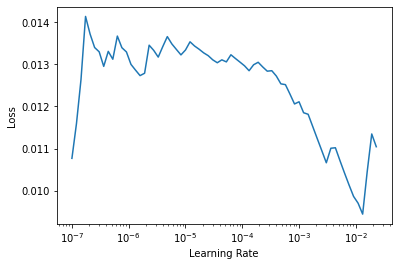

In [52]:
lr_min, lr_steep = learn.lr_find()

In [53]:
learn.fine_tune(20, base_lr = 10e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.758515,66.400650,0.090452,00:00


epoch,train_loss,valid_loss,accuracy,time
0,17.842558,6.755693,0.095477,00:00
1,10.561021,7.211905,0.100503,00:00
2,7.170705,3.922373,0.100503,00:00
3,5.231878,4.667776,0.115578,00:00
4,4.005180,4.584599,0.105528,00:00
5,3.211529,3.413851,0.105528,00:00
6,2.624443,4.218428,0.100503,00:00
7,2.159212,4.340089,0.105528,00:00
8,1.805331,4.060024,0.105528,00:00
9,1.523010,4.815680,0.150754,00:00


In [ ]:
learn.export()